# Astro 9

# Lecture 8: Intro to Pandas Continued

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Let's Look at some Plotting with Pandas

### Plotting a dataset

<AxesSubplot:>

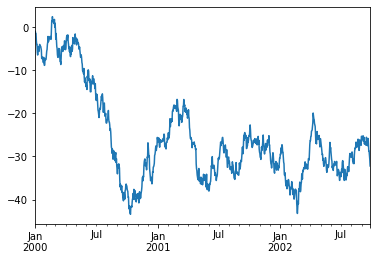

In [2]:
df = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

df = df.cumsum()

df.plot()

### Plotting 4 datasets at once

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

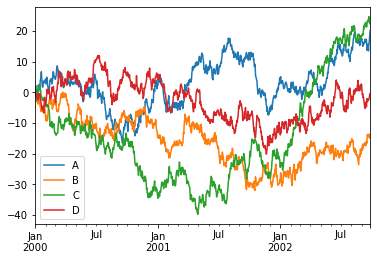

In [3]:
df2 = pd.DataFrame(np.random.randn(1000, 4), index=df.index, columns=list("ABCD"))

df2 = df2.cumsum()

plt.figure()

df2.plot()

### Scatter Plot

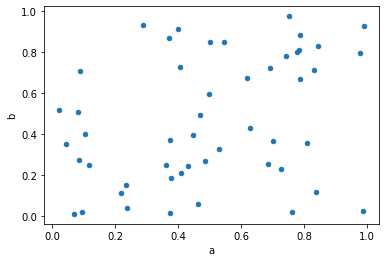

In [4]:
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10)


df.plot.scatter(x="a", y="b");

### Bar Plot

<AxesSubplot:>

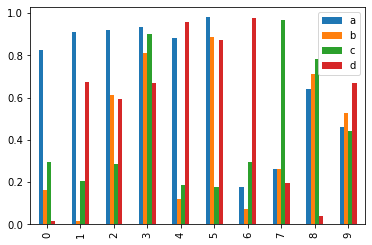

In [5]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar()

<AxesSubplot:>

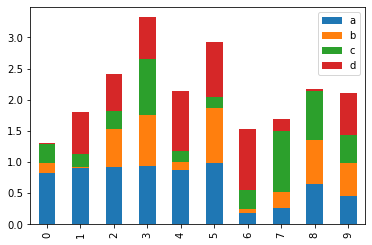

In [6]:
df2.plot.bar(stacked=True)

### Histograms

<Figure size 432x288 with 0 Axes>

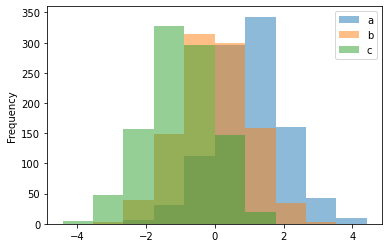

In [7]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)


plt.figure();

df4.plot.hist(alpha=0.5);

### Pie Chart

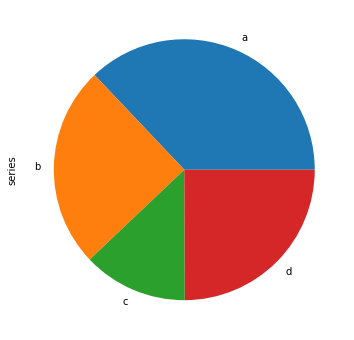

In [8]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6));

### 3 Variable Plot 

In [9]:
#load in the data to be corrected
beamspot_vals = np.loadtxt("with-mirror-200kpart.txt", comments = "%")

In [10]:
#define the datapoints within a pandas dataframe
df = pd.DataFrame(beamspot_vals, columns=['x', 'y', 'z', 'Intensity']) 
#delete the z axis data
df = df.drop('z', axis = 'columns')

Text(0, 0.5, 'Centimeters')

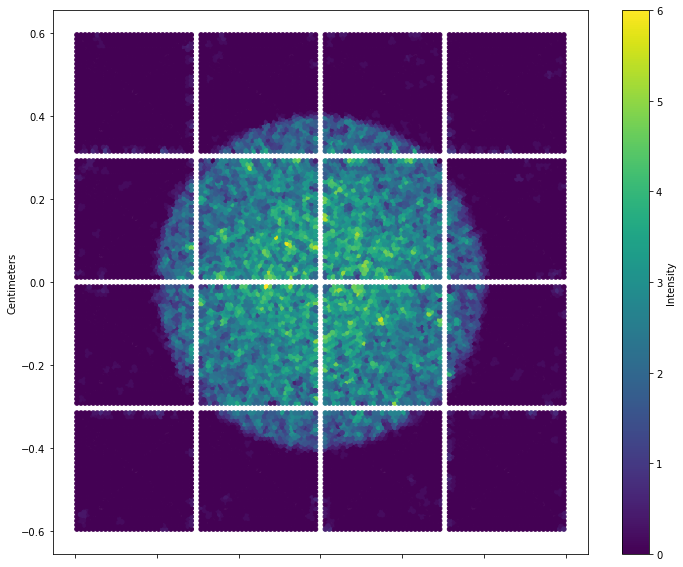

In [11]:
#display a plot of the data
df.plot.scatter(x='x', y='y', c='Intensity',cmap='viridis', figsize = (12,10))
plt.ylabel('Centimeters')

## New Example: Analyzing a Type-1a Supernova Lightcurve

In [17]:
data = np.loadtxt('type_1a.txt')
df = pd.DataFrame(data, columns=['HJD', 'V', '+/-'])
df

,HJD,V,+/-
0,53788.119,17.950,0.023
1,53788.128,17.972,0.022
2,53788.139,17.917,0.022
3,53788.147,18.010,0.023
4,53788.155,17.975,0.022
5,53788.164,17.921,0.022
6,53788.176,17.957,0.022
7,53788.184,17.941,0.022
8,53788.193,17.916,0.022
9,53789.130,17.801,0.028


Text(0, 0.5, 'Apparent Magnitude')

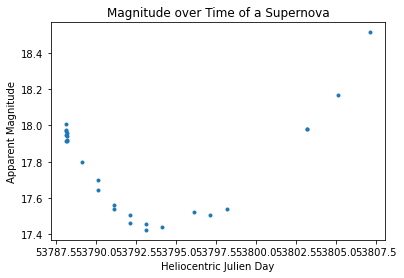

In [18]:
plt.title('Magnitude over Time of a Supernova')
plt.plot(df.HJD, df.V, '.')
plt.xlabel('Heliocentric Julien Day')
plt.ylabel('Apparent Magnitude')

Text(0, 0.5, 'Apparent Magnitude (Inverted)')

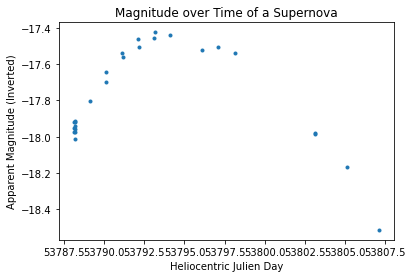

In [19]:
plt.title('Magnitude over Time of a Supernova')
plt.plot(df.HJD, -df.V, '.')
plt.xlabel('Heliocentric Julien Day')
plt.ylabel('Apparent Magnitude (Inverted)')

In [28]:
print(np.min(df.V))

17.425


In [36]:
def galactic_distance(m):
    M = 19.5
    d = 10**(5 + m - M)
    return d

print(galactic_distance(17.425), 'Parsecs')

841.3951416451964 Parsecs


In [37]:
# 1 Parsec = 3.26156 light years

dist = 3.26156 * galactic_distance(17.425)
print(dist, 'Light Years')

2744.260738184307 Light Years


### How Far Away is it Really?

What did we do wrong in our analysis?